STOCK MARKET PREDICTION USING NUMERICAL AND TEXTUAL ANALYSIS

stock price prediction using numerical analysis and sentimental analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import scipy.stats as stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
path= "/india-news-headlines.csv"
news_data = pd.read_csv(path)

In [6]:
news_data.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [7]:
news_data['published_date'] = np.array([str(str(str(x)[:4]) + '/' + str(str(x)[4:6]) + '/' + str(str(x)[6:])) for x in news_data['publish_date']])

In [8]:
news_data.head()

,publish_date,headline_category,headline_text,published_date
0,20010101,sports.wwe,win over cena satisfying but defeating underta...,2001/01/01
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,2001/01/02
2,20010102,unknown,Fissures in Hurriyat over Pak visit,2001/01/02
3,20010102,unknown,America's unwanted heading for India?,2001/01/02
4,20010102,unknown,For bigwigs; it is destination Goa,2001/01/02


In [9]:
news_data = news_data.drop('publish_date', axis=1)

In [10]:
news_data.head()

,headline_category,headline_text,published_date
0,sports.wwe,win over cena satisfying but defeating underta...,2001/01/01
1,unknown,Status quo will not be disturbed at Ayodhya; s...,2001/01/02
2,unknown,Fissures in Hurriyat over Pak visit,2001/01/02
3,unknown,America's unwanted heading for India?,2001/01/02
4,unknown,For bigwigs; it is destination Goa,2001/01/02


In [11]:
news_data['published_date'] = pd.to_datetime(news_data['published_date'])


In [12]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556280 entries, 0 to 556279
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   headline_category  556279 non-null  object        
 1   headline_text      556279 non-null  object        
 2   published_date     556280 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 12.7+ MB


In [13]:
news_data = news_data[['published_date', 'headline_text']]

In [14]:
news_data.columns = ['published_date', 'headline']

In [15]:
news_data.head()

,published_date,headline
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,Fissures in Hurriyat over Pak visit
3,2001-01-02,America's unwanted heading for India?
4,2001-01-02,For bigwigs; it is destination Goa


headlines with same published date

In [16]:
dict_news = {}

In [17]:
temp = news_data.loc[0, 'published_date']
temp2 = str(news_data.loc[0, 'headline'])
for x in range(1, len(news_data)):
    if news_data.loc[x, 'published_date']==temp:
        temp2 += '. ' + str(news_data.loc[x, 'headline'])
    else:
        dict_news[news_data.loc[x-1, 'published_date']] = temp2
        temp2 = ""
        temp = news_data.loc[x, 'published_date']

In [18]:
len(dict_news)

2614

In [19]:
indexes = np.arange(0, len(dict_news))

In [20]:
df_news = pd.DataFrame(indexes)

In [21]:
df_news.head()

,0
0,0
1,1
2,2
3,3
4,4


In [22]:
df_news['Date'] = dict_news.keys()

In [23]:
df_news.head()

,0,Date
0,0,2001-01-01
1,1,2001-01-02
2,2,2001-01-03
3,3,2001-01-04
4,4,2001-01-05


In [24]:
l = []
for i in dict_news.keys():
    l.append(dict_news[i])


In [25]:
l[0]

'win over cena satisfying but defeating undertaker bigger roman reigns'

In [26]:
df_news['Headline'] = np.array(l)

In [27]:
df_news.head()

,0,Date,Headline
0,0,2001-01-01,win over cena satisfying but defeating underta...
1,1,2001-01-02,. Fissures in Hurriyat over Pak visit. America...
2,2,2001-01-03,. Think again; Laxman tells Sangh Parivar. Hur...
3,3,2001-01-04,. Vajpayee gives big push to tech education; R...
4,4,2001-01-05,. Hawkings' day out. Light combat craft takes ...


In [28]:
df_news = df_news.drop(0, axis=1)

sentiment analysis

In [29]:
polarity = []
subjectivity = []
tuples = []
for i in df_news['Headline'].values:
    my_valence = TextBlob(i)
    tuples.append(my_valence.sentiment)

In [30]:
for i in tuples:
    polarity.append(i[0])
    subjectivity.append(i[1])

In [31]:
df_news['Polarity'] = np.array(polarity)
df_news['Subjectivity'] = np.array(subjectivity)


In [32]:
df_news.head()

,Date,Headline,Polarity,Subjectivity
0,2001-01-01,win over cena satisfying but defeating underta...,0.433333,0.633333
1,2001-01-02,. Fissures in Hurriyat over Pak visit. America...,0.151333,0.282333
2,2001-01-03,. Think again; Laxman tells Sangh Parivar. Hur...,0.163636,0.363636
3,2001-01-04,. Vajpayee gives big push to tech education; R...,0.087961,0.446847
4,2001-01-05,. Hawkings' day out. Light combat craft takes ...,0.260401,0.473984


In [33]:
temp = ['Positive', 'Negative', 'Neutral']
temp1 = ['Factual', 'Public']
polarity = []
subjectivity = []
for i in range(len(df_news)):
    pol = df_news.iloc[i]['Polarity']
    sub = df_news.iloc[i]['Subjectivity']
    if pol>=0:
        if pol>=0.2:
            polarity.append(temp[0])
        else:
            polarity.append(temp[2])
    else:
        if pol<=-0.2:
            polarity.append(temp[1])
        else:
            polarity.append(temp[2])
    
    if sub>=0.4:
        subjectivity.append(temp1[1])
    else:
        subjectivity.append(temp1[0])

In [34]:
df_news['Sentiment'] = polarity
df_news['Opinion'] = subjectivity

In [35]:
df_news.head()

,Date,Headline,Polarity,Subjectivity,Sentiment,Opinion
0,2001-01-01,win over cena satisfying but defeating underta...,0.433333,0.633333,Positive,Public
1,2001-01-02,. Fissures in Hurriyat over Pak visit. America...,0.151333,0.282333,Neutral,Factual
2,2001-01-03,. Think again; Laxman tells Sangh Parivar. Hur...,0.163636,0.363636,Neutral,Factual
3,2001-01-04,. Vajpayee gives big push to tech education; R...,0.087961,0.446847,Neutral,Public
4,2001-01-05,. Hawkings' day out. Light combat craft takes ...,0.260401,0.473984,Positive,Public


In [36]:
len(df_news)

2614

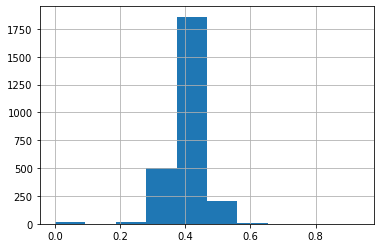

In [37]:
plt.figure(figsize=(6,4))
df_news['Subjectivity'].hist()
plt.show()

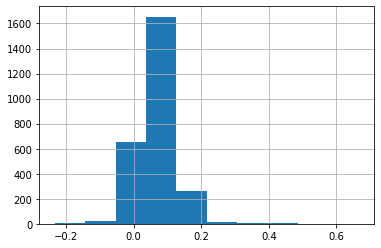

In [38]:
plt.figure(figsize=(6,4))
df_news['Polarity'].hist()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


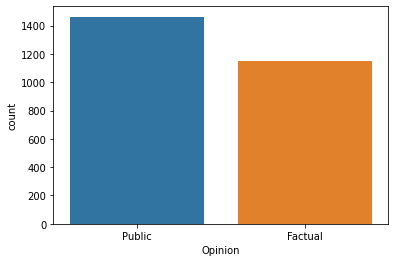

In [39]:
sns.countplot(df_news['Opinion'])

In [40]:
path = "/^BSESN.csv"
stocks = pd.read_csv(path)

In [41]:
stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-15,38316.488281,38635.191406,38238.269531,38506.089844,38506.089844,26200.0
1,2019-10-16,38637.050781,38666.378906,38416.671875,38598.988281,38598.988281,27500.0
2,2019-10-17,38647.441406,39104.691406,38557.429688,39052.058594,39052.058594,47100.0
3,2019-10-18,39087.828125,39361.058594,38963.601563,39298.378906,39298.378906,42400.0
4,2019-10-22,39233.398438,39426.468750,38924.851563,38963.839844,38963.839844,54500.0


In [42]:
len(stocks)

251

In [43]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       249 non-null    float64
 2   High       249 non-null    float64
 3   Low        249 non-null    float64
 4   Close      249 non-null    float64
 5   Adj Close  249 non-null    float64
 6   Volume     249 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.9+ KB


In [44]:
stocks.describe()

,Open,High,Low,Close,Adj Close,Volume
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,37309.108701,37561.834400,36941.821748,37238.783046,37238.783046,22302.008032
std,3944.932131,3794.355567,4103.380643,3952.569597,3952.569597,18578.895523
min,26499.810547,27462.869141,25638.900391,25981.240234,25981.240234,0.000000
25%,34335.378906,34769.480469,33958.019531,34247.050781,34247.050781,13900.000000
50%,38471.929688,38729.660156,38219.968750,38417.230469,38417.230469,18400.000000
75%,40606.011719,40786.820313,40337.531250,40575.171875,40575.171875,25200.000000
max,42263.000000,42273.871094,41850.289063,41952.628906,41952.628906,188300.000000


In [45]:
stocks['HL_pct']=((stocks['High']-stocks['Low'])/stocks['Low'])*100
stocks['PCT_change']=((stocks['Close']-stocks['Open'])/stocks['Open'])*100

In [46]:
stocks = stocks.drop(['Open','High','Close','Low'], axis=1)

In [47]:
stocks.head()

,Date,Adj Close,Volume,HL_pct,PCT_change
0,2019-10-15,38506.089844,26200.0,1.038023,0.494830
1,2019-10-16,38598.988281,27500.0,0.649997,-0.098513
2,2019-10-17,39052.058594,47100.0,1.419342,1.046944
3,2019-10-18,39298.378906,42400.0,1.020073,0.538661
4,2019-10-22,38963.839844,54500.0,1.288681,-0.687064


In [48]:
stocks['Date'] = pd.to_datetime(stocks['Date'])

In [49]:
stocks.head()

,Date,Adj Close,Volume,HL_pct,PCT_change
0,2019-10-15,38506.089844,26200.0,1.038023,0.494830
1,2019-10-16,38598.988281,27500.0,0.649997,-0.098513
2,2019-10-17,39052.058594,47100.0,1.419342,1.046944
3,2019-10-18,39298.378906,42400.0,1.020073,0.538661
4,2019-10-22,38963.839844,54500.0,1.288681,-0.687064


In [50]:
df_news.columns = ['Date', 'Headline', 'Polarity', 'Subjectivity', 'Sentiment', 'Opinion']

MERGING

In [51]:
merge_data = df_news.merge(stocks, how='inner', on='Date', left_index = True)

In [52]:
merge_data.head()

,Date,Headline,Polarity,Subjectivity,Sentiment,Opinion,Adj Close,Volume,HL_pct,PCT_change


In [ ]:
merge_data = merge_data.reset_index()

In [ ]:
merge_data.head()

In [ ]:
merge_data.info()

In [ ]:
merge_data = merge_data.drop(0)

In [ ]:
merge_data = merge_data[merge_data['Adj Close'].notna()]

In [ ]:
merge_data.info()

In [ ]:
merge_data = merge_data.reset_index()
merge_data.head()

In [ ]:
merge_data = merge_data.drop(['level_0', 'index'], axis=1)
merge_data.head()

In [ ]:
df_needed = merge_data[['Date', 'Polarity', 'Subjectivity','Adj Close','HL_pct','PCT_change']]
df_needed.head()

In [ ]:
df_needed = df_needed.set_index('Date')

In [ ]:
df_needed.head()

In [ ]:
scaler = MinMaxScaler()
new = pd.DataFrame(scaler.fit_transform(df_needed))
new.columns = df_needed.columns
new.index=df_needed.index
new.head()

In [ ]:
trainSet = new[: int(0.7*(len(new)))]
testSet = new[int(0.7*(len(new))):]

In [ ]:
model = VAR(endog = trainSet)
fit = model.fit()


In [ ]:
pred = fit.forecast(fit.y, steps=len(testSet))
predicted = pd.DataFrame(pred, columns=new.columns)

In [ ]:
predicted.head()

In [ ]:
testSet.head()

In [ ]:
np.sqrt(mean_squared_error(predicted['Adj Close'], testSet['Adj Close']))

In [ ]:
sns.jointplot(testSet['Adj Close'], predicted['Adj Close']).annotate(stats.pearsonr)
plt.show()